# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [17]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_temperature_facts = []
rows = table.find_all('tr')

# Loop through the scraped data to create a list of rows
for row in rows:
    cols = row.find_all(['td', 'th'])
    cols = [col.text.strip() for col in cols]
    mars_temperature_facts.append(cols)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_temperature_facts[1:], columns=mars_temperature_facts[0])
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [8]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [9]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [10]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [83]:
# 1. How many months are there on Mars?
mars_df["month"].max()


12

In [12]:
# 1. How many months are there on Mars?


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [11]:
# 2. How many Martian days' worth of data are there?
len(mars_df)

1867

In [13]:
# 3. What is the average low temperature by month?
mars_month_grouped = mars_df.groupby("month")
mars_month_min_temp = mars_month_grouped["min_temp"].mean()
mars_month_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

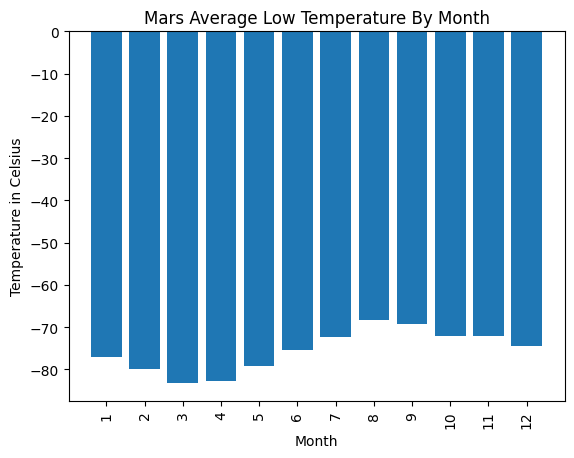

In [41]:
# Plot the average temperature by month
x_axis = mars_month_min_temp.index.values
plt.bar(x_axis, mars_month_min_temp, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, rotation="vertical")
plt.xlabel("Month")
plt.ylabel("Temperature in Celsius")
plt.title("Mars Average Low Temperature By Month")
plt.show()

In [63]:
# Identify the coldest and hottest months in Curiosity's location
temp_sort = mars_month_min_temp.sort_values(ascending=True)
temp_sort_reset = temp_sort.reset_index()
temp_sort_reset['month'] = temp_sort_reset['month'].astype(str)
temp_sort_reset

,month,min_temp
0,3,-83.307292
1,4,-82.747423
2,2,-79.932584
3,5,-79.308725
4,1,-77.160920
5,6,-75.299320
6,12,-74.451807
7,7,-72.281690
8,11,-71.985507
9,10,-71.982143


- The coldest month in Curiosity's location was Month 3
- The hottest month in Curiosity's location was Month 8

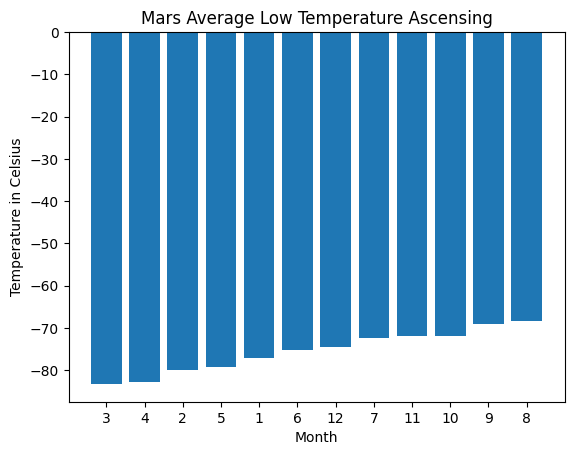

In [64]:
# Identify the coldest and hottest months in Curiosity's location
plt.bar(temp_sort_reset["month"], temp_sort_reset["min_temp"])
plt.xlabel("Month")
plt.ylabel("Temperature in Celsius")
plt.title("Mars Average Low Temperature Ascensing")
plt.show()

In [69]:
# 4. Average pressure by Martian month
mars_month_pressure = mars_month_grouped["pressure"].mean()
pressure_sort = mars_month_pressure.sort_values(ascending=True)
pressure_sort_reset = pressure_sort.reset_index()
pressure_sort_reset['month'] = pressure_sort_reset['month'].astype(str)
pressure_sort_reset

,month,pressure
0,6,745.054422
1,5,748.557047
2,7,795.105634
3,4,806.329897
4,12,842.156627
5,11,857.014493
6,1,862.488506
7,8,873.829787
8,3,877.322917
9,10,887.312500


- The lowest pressure at Curiosity's location was Month 6
- The highest pressure at Curiosity's location was Month 9

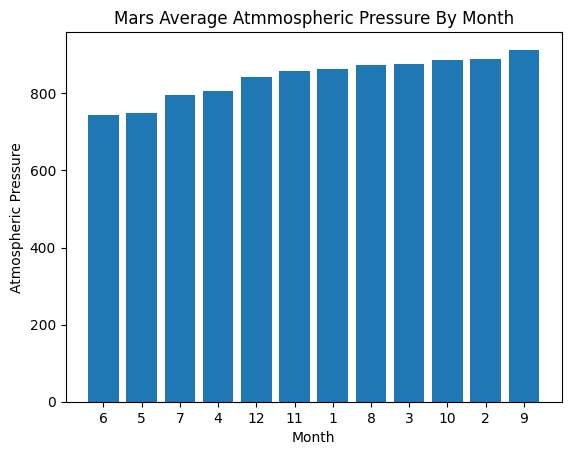

In [71]:
# Plot the average pressure by month
plt.bar(pressure_sort_reset["month"], pressure_sort_reset["pressure"])
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.title("Mars Average Atmmospheric Pressure By Month")
plt.show()

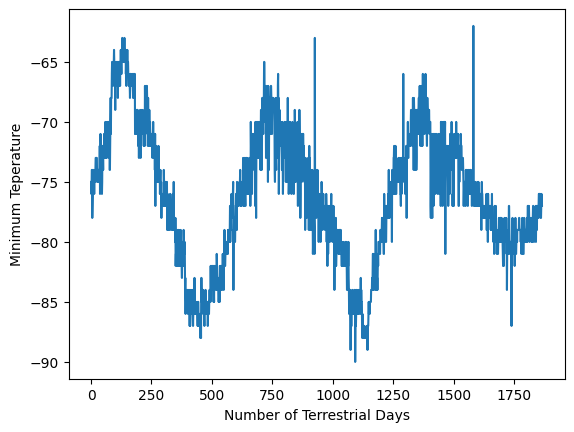

In [81]:
# 5. How many terrestrial (earth) days are there in a Martian year?
x_values = mars_df.index[mars_df.index % 250 == 0]
plt.plot(mars_df["min_temp"])
plt.xticks(x_values, labels = ["0", "250", "500", "750", "1000", "1250", "1500", "1750"])
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Teperature")
plt.show()

Mars Temperature Data Summary

Minimum Temperature Data
- The coldest month based on Curoisity's location was Month 3
- The hottest month based on Curoisity's location was Month 8

Atmospheric Pressure Data
- The month with the lowest pressure based on Curiosity's location was Month 6
- The month with the highest pressure based on Curiosity's location was Month 9

Terrestrial Days Data
- To estimate how many terrestrial days exist in a Martian year, we can view the Minimum Teperature data and calculate the distance within a complete cycle from peak-to-peak or low-to-low. Based on this data, two lows exist at ~450 days and ~1125 days. This shows that a year on Mars occurs roughlt every (1125-450) = 675 days.
- Online, it is noted that a Mars year is equivalent to 687 Earth days, which is close to the estimation above.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [82]:
# Write the data to a CSV
mars_df.to_csv("mars_df.csv")

In [21]:
browser.quit()